In [159]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
import os # Import os module for path manipulation
print(mpl.__version__)

# Ensure any previously downloaded corrupted Roboto-Regular.ttf is removed
!rm -f /content/Roboto-Regular.ttf

# Download Times New Roman font
!wget -O TimesNewRoman.ttf https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

# Install Roboto font via apt-get for system-wide availability
# Using > /dev/null to suppress verbose output
!apt-get update -qq > /dev/null
!apt-get install -y fonts-roboto > /dev/null

# Clear matplotlib's font cache to ensure new fonts are detected
fm.fontManager.ttflist.clear()

# Paths to search for fonts
font_search_paths = ["/content/", "/usr/share/fonts/truetype/"]

# Collect all .ttf font files from specified paths
font_paths_to_add = []
for search_path in font_search_paths:
    for root, _, files in os.walk(search_path):
        for file in files:
            if file.endswith(".ttf"):
                font_paths_to_add.append(os.path.join(root, file))

# Add unique font paths to matplotlib's font manager
for font_path in set(font_paths_to_add):
    try:
        # Only add fonts if they contain 'roboto' or 'times new roman' in their name
        if 'roboto' in os.path.basename(font_path).lower() or \
           'times new roman' in os.path.basename(font_path).lower().replace(' ', ''):
            fm.fontManager.addfont(font_path)
            print(f"Successfully added font: {font_path}")
    except Exception as e:
        print(f"Failed to add font {font_path}: {e}")

# Configure the 'sans-serif' family to prefer Roboto
if 'Roboto' in [f.name for f in fm.fontManager.ttflist]:
    mpl.rcParams['font.sans-serif'] = ['Roboto'] + mpl.rcParams['font.sans-serif']
    print("Configured 'sans-serif' family to prefer Roboto.")

# Set the overall font family to sans-serif
plt.rcParams['font.family'] = 'sans-serif'
print("Default font set to sans-serif (preferring Roboto).")


3.10.0
--2025-12-08 00:57:36--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-12-08 00:57:37--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘TimesNewRoman.ttf’

TimesNewRoman.ttf   100%[===================>] 814.89K  --.-KB/s    in 0.04s   

2025-12-08 00:57:37 (17.9 MB/s) - ‘TimesNewRoman.ttf’ saved [834452/834452]

W:

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
GCCWeapons2024DF = pd.read_csv('/content/drive/My Drive/GCC Weapon Picks 2024 vs 2025/GCC 2024 Weapon Picks.csv', encoding='latin1') #Load CSVs into Dataframes
GCCWeapons2025DF = pd.read_csv('/content/drive/My Drive/GCC Weapon Picks 2024 vs 2025/GCC 2025 Weapon Picks.csv', encoding='latin1')

In [162]:
GCCWeap24 = GCCWeapons2024DF[['Weapon', 'Pick Percentage']]
GCCWeap24.head() #make dataframe more workable by only including weapon and pick percentage

,Weapon,Pick Percentage
0,Vandal,51.10
1,Sheriff,10.07
2,Phantom,8.27
3,Classic,8.09
4,Ghost,6.61


In [163]:
GCCWeap25 = GCCWeapons2025DF[['Weapon', 'Pick Percentage']]
GCCWeap25.head() #make dataframe more workable by only including weapon and pick percentage

,Weapon,Pick Percentage
0,Vandal,38.92
1,Phantom,17.77
2,Sheriff,9.51
3,Classic,8.71
4,Ghost,6.58


In [164]:
GCCWeap25 = GCCWeap25.copy()
GCCWeap25['Year'] = 2025
print("Added 'Year' column to GCCWeap25 DataFrame:")
print(GCCWeap25.head()) #add years to Dataframes to prepare it for grouped bar chart

Added 'Year' column to GCCWeap25 DataFrame:
    Weapon  Pick Percentage  Year
0   Vandal            38.92  2025
1  Phantom            17.77  2025
2  Sheriff             9.51  2025
3  Classic             8.71  2025
4    Ghost             6.58  2025


In [165]:
GCCWeap24 = GCCWeap24.copy()
GCCWeap24['Year'] = 2024
print("Added 'Year' column to GCCWeap24 DataFrame:")
print(GCCWeap24.head()) #add years to Dataframes to prepare it for grouped bar chart

Added 'Year' column to GCCWeap24 DataFrame:
    Weapon  Pick Percentage  Year
0   Vandal            51.10  2024
1  Sheriff            10.07  2024
2  Phantom             8.27  2024
3  Classic             8.09  2024
4    Ghost             6.61  2024


In [166]:
GCCWeapBoth = [GCCWeap24, GCCWeap25]
GCCConcat = pd.concat(GCCWeapBoth) #con dataframes for grouped bar chart
print(GCCConcat)

      Weapon  Pick Percentage  Year
0     Vandal            51.10  2024
1    Sheriff            10.07  2024
2    Phantom             8.27  2024
3    Classic             8.09  2024
4      Ghost             6.61  2024
5    Bulldog             4.52  2024
6   Guardian             2.84  2024
7   Operator             2.21  2024
8    Stinger             1.45  2024
9    Spectre             1.42  2024
10    Outlaw             1.13  2024
11     Bucky             0.59  2024
12      Odin             0.57  2024
13     Judge             0.44  2024
14    Frenzy             0.28  2024
15   Marshal             0.24  2024
16    Shorty             0.11  2024
17      Ares             0.07  2024
0     Vandal            38.92  2025
1    Phantom            17.77  2025
2    Sheriff             9.51  2025
3    Classic             8.71  2025
4      Ghost             6.58  2025
5   Guardian             4.49  2025
6    Bulldog             3.36  2025
7   Operator             3.14  2025
8     Outlaw             1.9

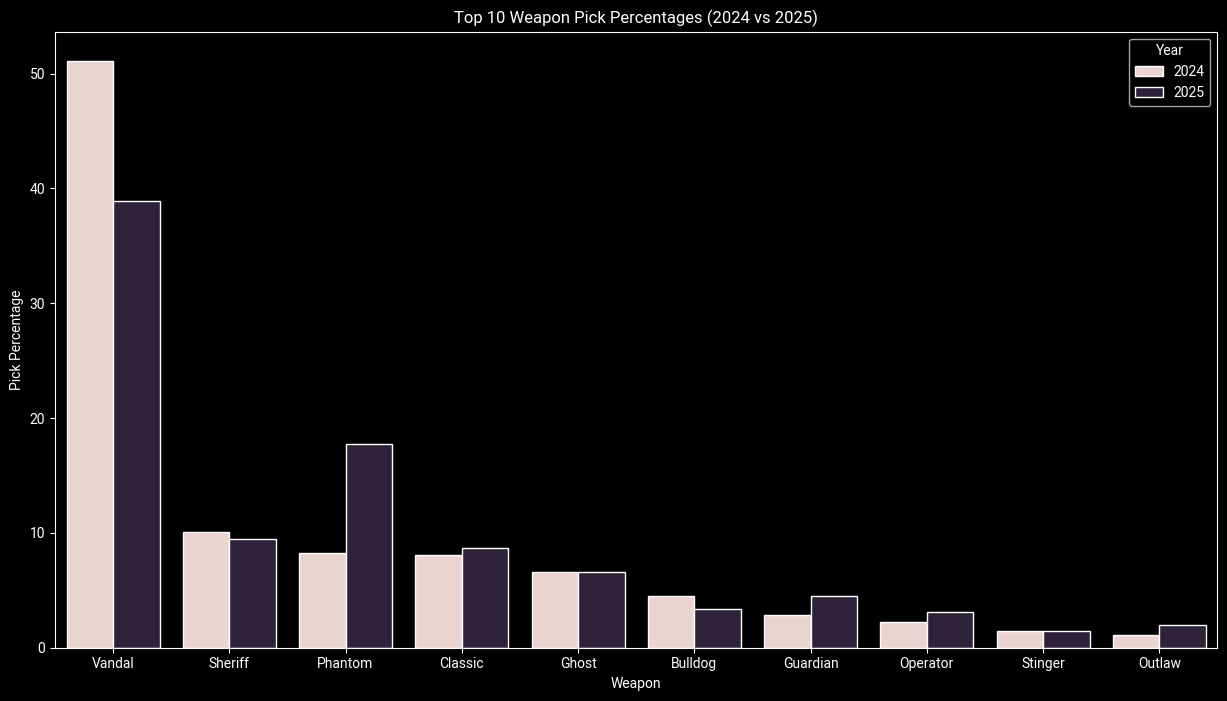

In [167]:
plt.rcParams['font.family'] = 'sans-serif'
#calculate the mean pick percentage for each weapon across both years to determine overall top weapons
mean_pick_percentage = GCCConcat.groupby('Weapon')['Pick Percentage'].mean().sort_values(ascending=False)

#get the top 10 weapons
top_10_weapons = mean_pick_percentage.head(10).index

#filter the GCCConcat DataFrame to include only these top 10 weapons
GCCConcat_top10 = GCCConcat[GCCConcat['Weapon'].isin(top_10_weapons)]

plt.figure(figsize=(15, 8))
sns.barplot(x = 'Weapon', y = 'Pick Percentage', hue="Year", data = GCCConcat_top10)
plt.title('Top 10 Weapon Pick Percentages (2024 vs 2025)')
plt.xlabel('Weapon')
plt.ylabel('Pick Percentage')
plt.show()

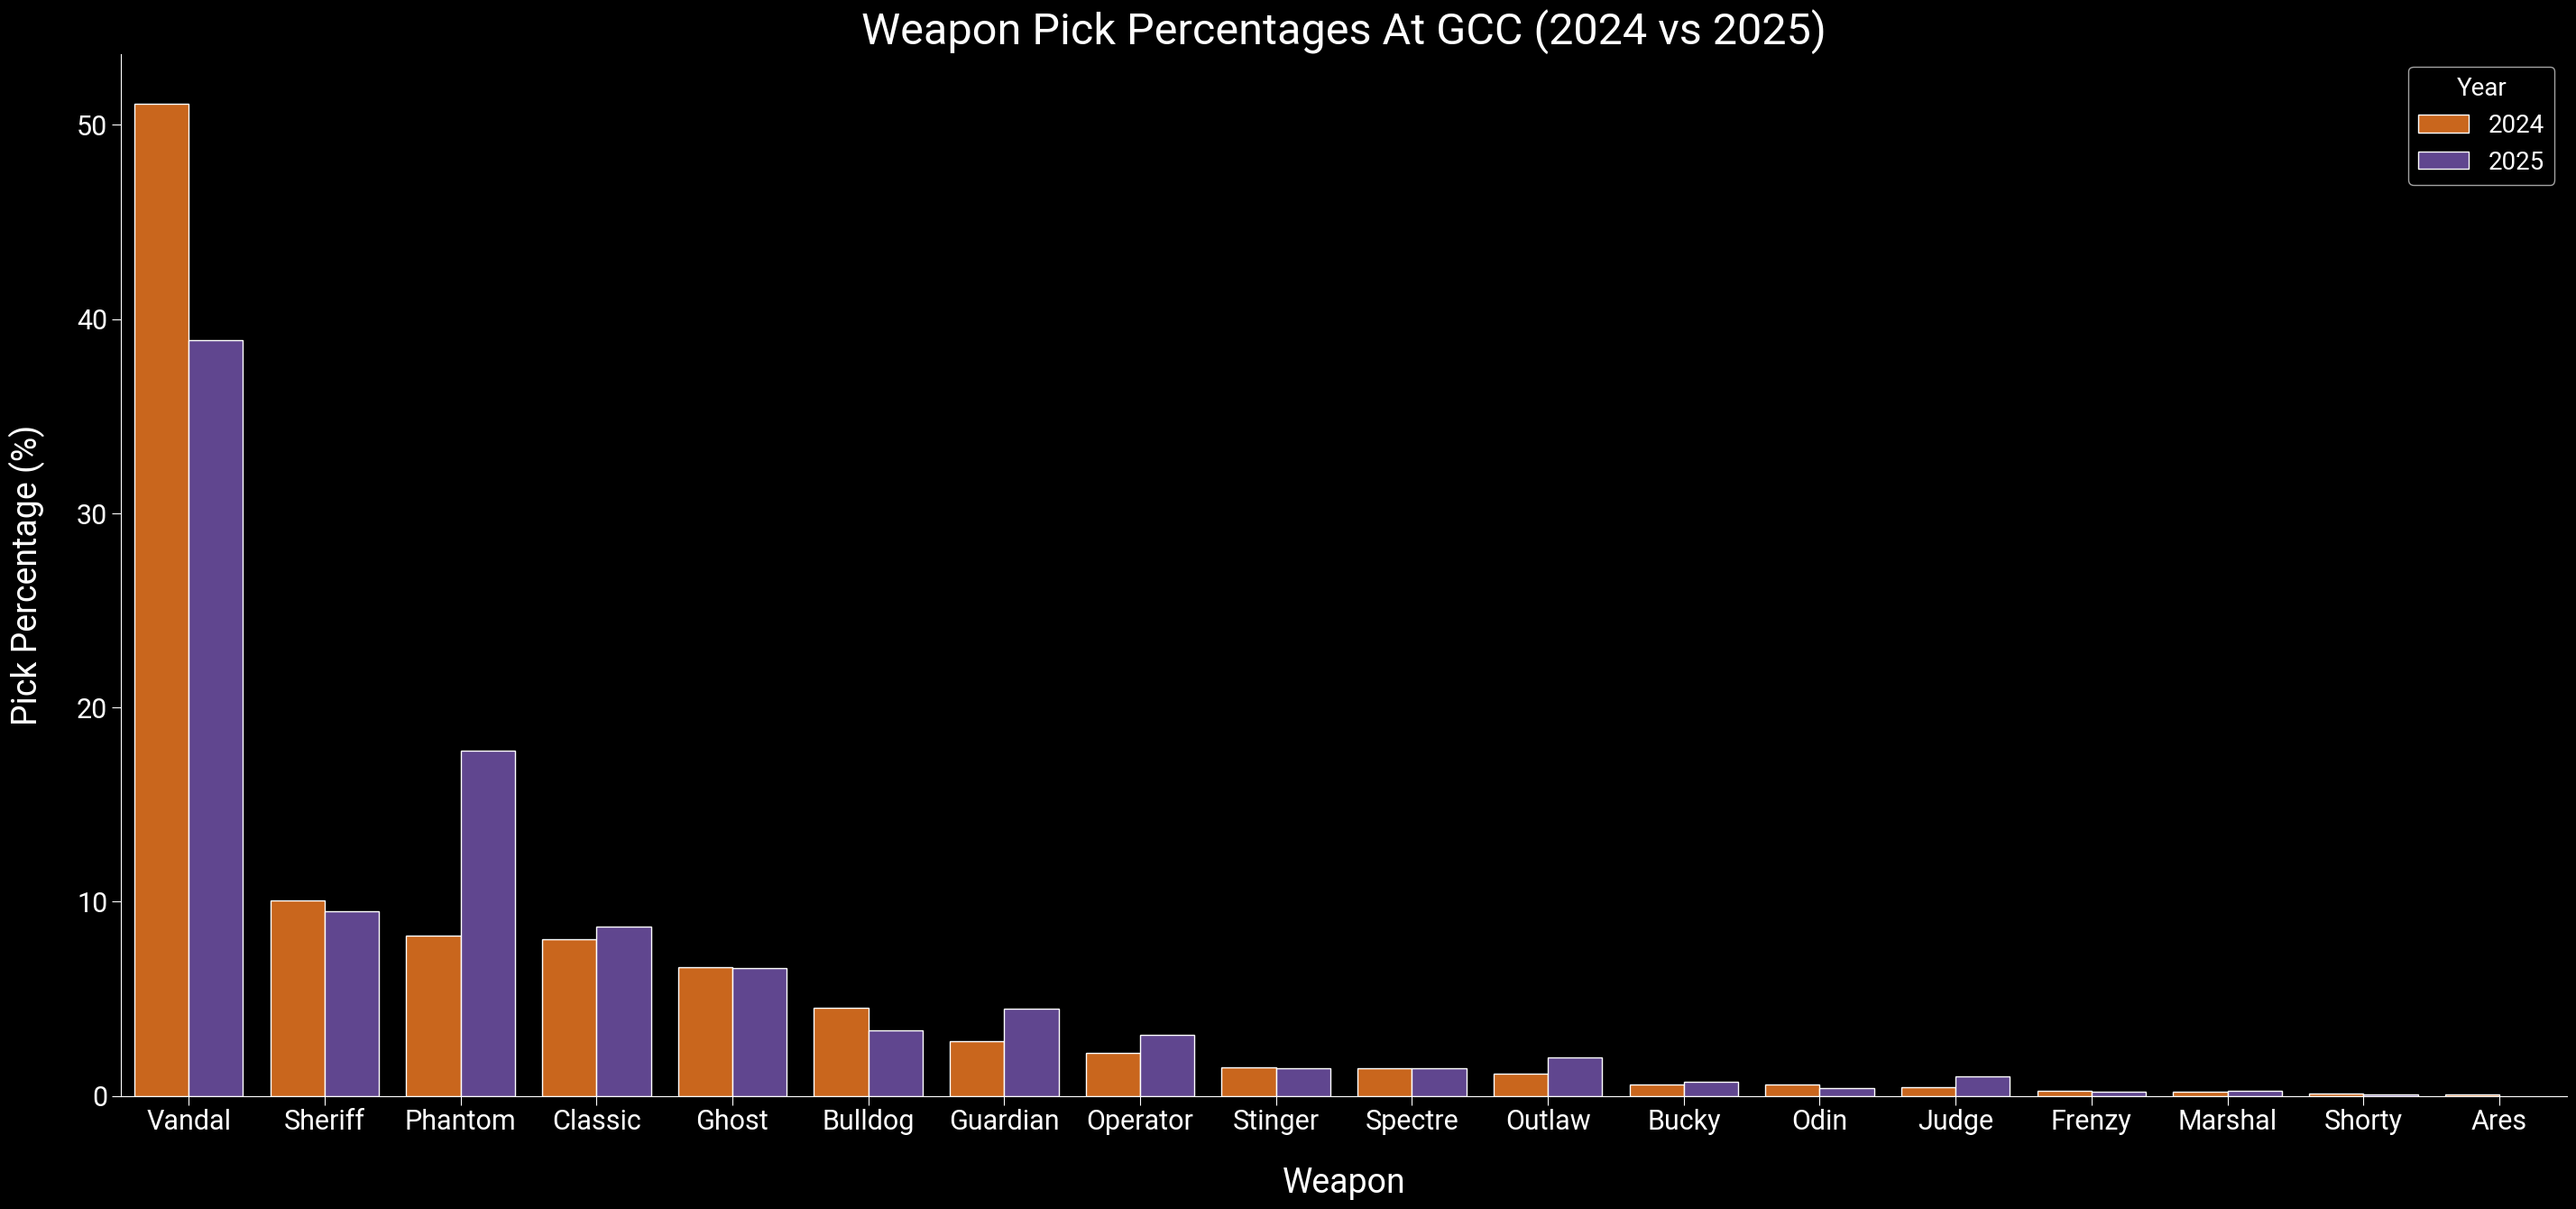

In [175]:
plt.figure(figsize=(35, 15)) #set figure size
sns.set_style("ticks") #set style
plt.style.use("dark_background")  # inverts colors to dark theme

# Explicitly set font family after style, using the installed Roboto font
plt.rcParams['font.family'] = ['Roboto']

colors = ["#E66100", "#5D3A9B"]

sns.barplot(x = 'Weapon', y = 'Pick Percentage', hue="Year", data = GCCConcat, palette=colors) #plotting out chart visuals and labels
plt.title('Weapon Pick Percentages At GCC (2024 vs 2025)', fontsize=35, color = 'white')
plt.xlabel('Weapon', fontsize=27, labelpad = 25)
plt.ylabel('Pick Percentage (%)', fontsize=27, labelpad = 25)

plt.xticks(fontsize=22) # Set font size for x-axis tick labels
plt.yticks(fontsize=22) # Set font size for y-axis tick labels

plt.tick_params(axis='y', length=7) #set tick lengths
plt.tick_params(axis='x', length=7)

plt.legend(title='Year', fontsize=20, title_fontsize= 20 )

plt.gca().spines[['top', 'right']].set_visible(False);

plt.show()